In [1]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
from PIL import Image
import datetime

In [2]:
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn import visualize

#COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco_0048.h5")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


In [3]:
class BangunanConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "bangunan"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2 # tadinya 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + bangunan

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100 # tadinya 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.1 # GANTI SESUAI KEBUTUHAN !!!
    
    DETECTION_MAX_INSTANCES = 1000
    
class InferenceConfig(BangunanConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        1000
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
weights_path = "mask_rcnn_bangunan_0034.h5"
model.load_weights(weights_path, by_name=True)

class_names = ['BG', 'bangunan']








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








Processing 1 images
image                    shape: (256, 256, 3)         min:    5.00000  max:  245.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  139.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


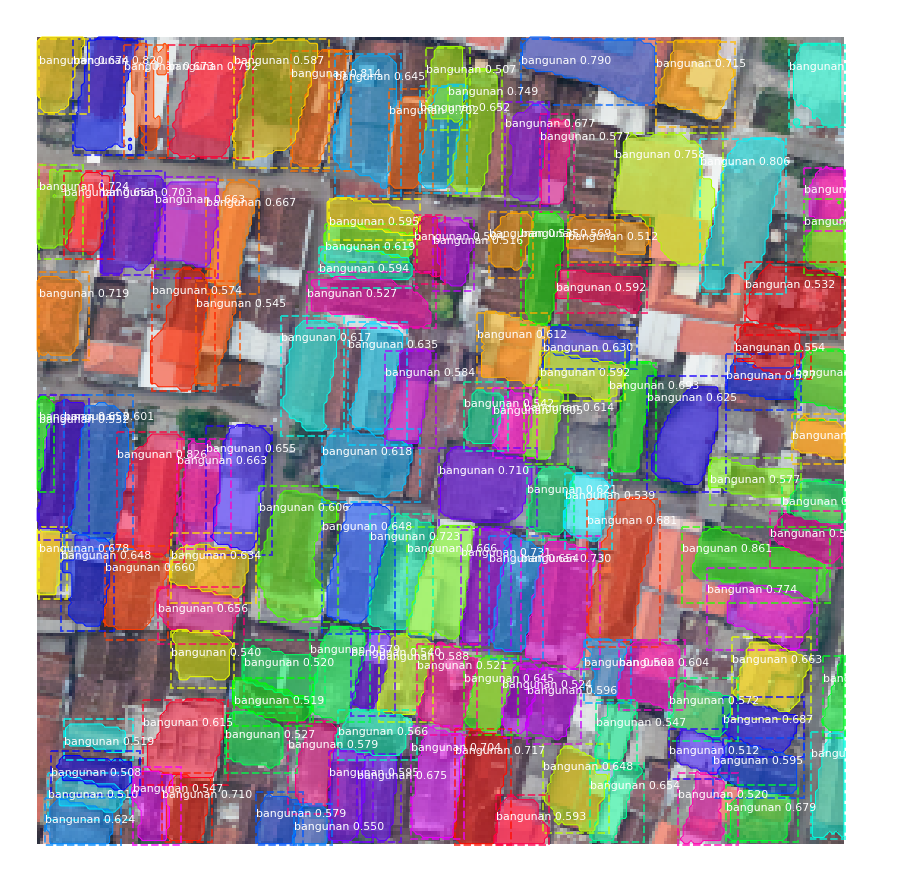

In [6]:
image = skimage.io.imread("../../datasets/surabaya_test/BU/BU_C1.tif")
r = model.detect([image], verbose=1)[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [11]:
# menyimpan masks hasil prediksi dalam h5
import h5py
masks = r['masks']
print(masks.dtype)
hf = h5py.File('masks.h5', 'w')
hf.create_dataset('masks', data=masks)
hf.close()

bool


In [43]:
# menyimpan instance hasil prediksi
#print(r.keys())
#print(r["rois"])

# menyimpan dictionary
with open('dict.txt', 'w') as f:
    print(r["masks"], file=f)
    
# menyimpan setiap mask dalam sebagai text terpisah
a = np.zeros((256,256,123),dtype=int)
for i in range(256):
    for j in range(256):
        for k in range(123):
            if r['masks'][i][j][k] == True:
                a[i,j,k] = 1
            else:
                a[i,j,k] = 0
                
for i in range(123):
    np.savetxt('.\masks\masks_{:}.txt'.format(i), a[:,:,i], fmt='%.0f')

In [31]:
# untuk nyimpan masks di jpg sejumlah banyaknya masks

for n in range(r['masks'].shape[2]):
    maskn = r['masks'][:,:,n]
    maskn_im = np.zeros((len(maskn),len(maskn)), dtype = np.uint8)
    for i in range(len(maskn)):
        for j in range(len(maskn)):
            if maskn[i,j] == True:
                maskn_im[i,j] = 255
    img = Image.fromarray(maskn_im, 'L')
    file_name = ".\masks\masks_{:}.jpg".format(n)
    #print(n)
    img.save(file_name)

In [38]:
im = Image.open('.\masks\masks_0.jpg')
im_arr = np.array(im)
im_arr [250,:255]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# untuk menggabungkan semua mask di 1 image
mask_tot = np.zeros((r['masks'].shape[0],r['masks'].shape[0]))
mask_totgab = np.zeros((r['masks'].shape[0],r['masks'].shape[0]), dtype = np.uint8)
for n in range(r['masks'].shape[2]):
    maskn = r['masks'][:,:,n]
    for i in range(len(maskn)):
        for j in range(len(maskn)):
            if maskn[i,j] == True:
                mask_tot[i,j] = n+1 # isinya ID mask
                mask_totgab[i,j] = 255 # putih untuk mask, hitam untuk BG 

# untuk nyimpan di tif dengan FG BG
img = Image.fromarray(mask_totgab, 'L')
file_name = "jojo_38.tif"
#img.save(file_name)

# untuk nyimpan di tiff dengan ID
img = Image.fromarray(mask_tot, mode=None)
file_name = "mask_tot_{:%Y%m%dT%H%M%S}.tif".format(datetime.datetime.now())
#img.save(file_name)

In [ ]:
#i = Image.open('mask_jojo_28_20200526T150244.tif')
#i.mode
#from numpy import asarray
#data = asarray(i)
#print(data.shape)
#print(np.sum(data))